### Table of content
#### Import libraries
#### Import data
#### Data preprocessing
#### Applying the elbow technique
#### K-means clustering
#### Data visualization

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler # For standardizing
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm fro m scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [11]:
%matplotlib inline

### Import data

In [2]:
# Creating path

path = r"C:\Users\tseki\OneDrive\Documents\Careerfoundry\Data immersion\Achievement 6"

In [3]:
data = pd.read_csv(os.path.join(path, 'Data', 'Prepared', 'data_merge.csv'), index_col = [0])

In [4]:
data.head()

,price,bed,bath,acre_lot,city,zip_code,house_size,sold_date,county
0,525000.0,3.0,3.0,0.45,Agawam,1001.0,2314.0,2014-06-25,Hampden
1,289900.0,3.0,2.0,0.36,Agawam,1001.0,1276.0,2012-10-12,Hampden
2,384900.0,3.0,2.0,0.46,Agawam,1001.0,1476.0,1986-11-20,Hampden
3,199999.0,3.0,2.0,1.76,Agawam,1001.0,1968.0,2008-09-19,Hampden
4,419000.0,4.0,2.0,2.00,Pelham,1002.0,1607.0,2005-07-25,Hampshire


### Data preprocessing

In [6]:
# Dropping categorical variables

data = data.drop(columns = ['city', 'zip_code', 'sold_date', 'county'])

In [7]:
data.head()

,price,bed,bath,acre_lot,house_size
0,525000.0,3.0,3.0,0.45,2314.0
1,289900.0,3.0,2.0,0.36,1276.0
2,384900.0,3.0,2.0,0.46,1476.0
3,199999.0,3.0,2.0,1.76,1968.0
4,419000.0,4.0,2.0,2.00,1607.0


In [8]:
# Standardizing data

scaler = StandardScaler()
data_std = scaler.fit_transform(data)

### Applying the elbow technique

In [12]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [13]:
score = [kmeans[i].fit(data_std).score(data_std) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-15240.00000000001,
 -10063.350922515227,
 -8020.188244092469,
 -6047.45716260145,
 -5187.705211956501,
 -4634.536314789697,
 -4173.710616293695,
 -3675.512953483959,
 -3299.4406723169805]

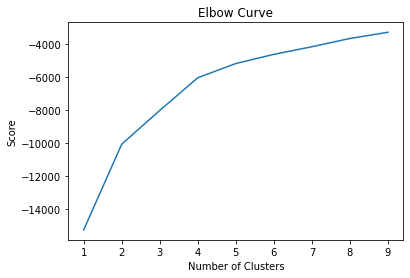

In [14]:
# Plotting the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Optimal number of clusters is about 3. There are 3 prominent break points in the curve.

### K-means clustering

In [27]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [28]:
# Fit the k-means object to the data.

kmeans.fit(data_std)

KMeans(n_clusters=3)

In [29]:
# Add a new column clusters based on the clustering done

data['clusters'] = kmeans.fit_predict(data_std)

In [30]:
data.head()

,price,bed,bath,acre_lot,house_size,clusters
0,525000.0,3.0,3.0,0.45,2314.0,0
1,289900.0,3.0,2.0,0.36,1276.0,0
2,384900.0,3.0,2.0,0.46,1476.0,0
3,199999.0,3.0,2.0,1.76,1968.0,0
4,419000.0,4.0,2.0,2.00,1607.0,0


In [31]:
data['clusters'].value_counts()

0    2177
2     770
1     101
Name: clusters, dtype: int64

### Data visualization

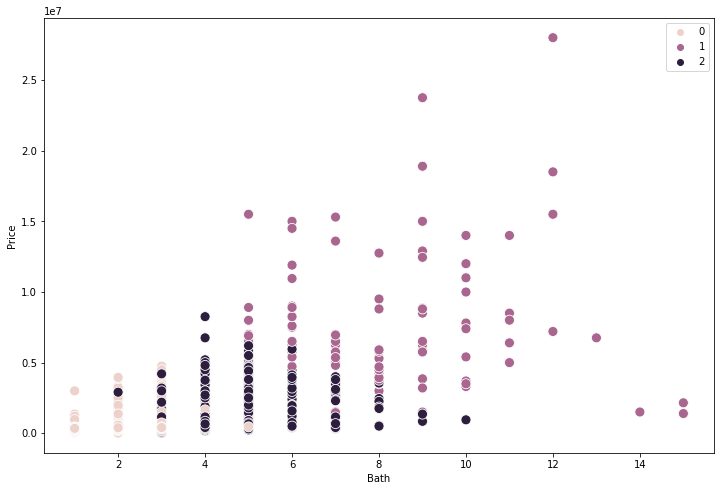

In [32]:
# Plot the clusters for the "Price" and "bath" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data['bath'], y=data['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Bath') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

#### The pink cluster has lower prices and less than 5 baths
#### The purple cluster has higher prices and more than 5 baths
#### The dark purple cluster has mostly between 3 and 8 baths and are more affordable than the purple.
#### Generally we see that houses with more baths are higher in prices, except for a few towards the extreme right with 14+ baths and relatively low prices.

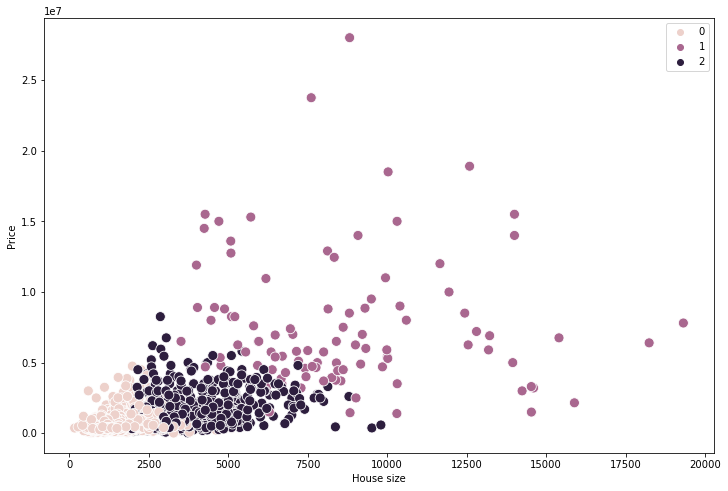

In [33]:
# Plot the clusters for the "House size" and "Price " variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data['house_size'], y=data['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('House size') 
plt.ylabel('Price') 
plt.show()

#### The pink cluster comprise of houses that are less than 3000 sq ft with the lowest price
#### The purple cluster mostly comprise of houses that are above 4000 sq ft and have the highest prices
#### The dark purple cluster mostly comprise of houses between 2700 and 7500 sq ft and are more affordable than those in the purple cluster.

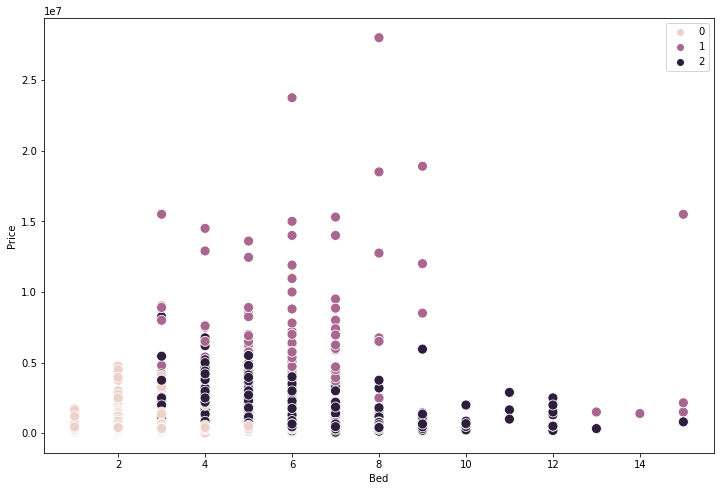

In [37]:
# Plot the clusters for the "beds" and "Price " variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data['bed'], y=data['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Bed') 
plt.ylabel('Price') 
plt.show()

#### The pink cluster mostly comprise of houses with less than 4 beds and has the lowest price
#### The purple cluster mostly comprise of houses with more than 4 beds and has the highest price
#### The dark purple cluster has options with a lot of bedrooms yet more affordable than the purple cluster.

In [34]:
# Creating new column cluster to make the clusters more comprehensible

data.loc[data['clusters'] == 2, 'cluster'] = 'dark purple'
data.loc[data['clusters'] == 1, 'cluster'] = 'purple'
data.loc[data['clusters'] == 0, 'cluster'] = 'pink'


In [35]:
data['cluster'].value_counts()

pink           2177
dark purple     770
purple          101
Name: cluster, dtype: int64

In [36]:
data.groupby('cluster').agg({'bath':['mean', 'median'], 
                         'bed':['mean', 'median'], 
                         'house_size':['mean', 'median'],
                         'acre_lot':['mean', 'median'],
                          'price':['mean', 'median']})

bath              bed          house_size           acre_lot  \
                 mean median      mean median         mean  median       mean   
cluster                                                                         
dark purple  4.005195    4.0  5.177922    5.0  3753.922078  3493.5   1.474831   
pink         2.024805    2.0  3.016077    3.0  1682.043179  1618.0   0.906844   
purple       7.980198    8.0  6.237624    6.0  8570.752475  8139.0  11.081584   

                           price             
            median          mean     median  
cluster                                      
dark purple   0.44  1.462552e+06  1137000.0  
pink          0.25  6.179385e+05   535000.0  
purple        1.68  7.499910e+06  6250000.0

#### From the summary stats above we see that dark purple cluster has a median price of 1.1 million dollars, median bath of 4, median bed of 5, median house size of 3,493 sq ft and median acre_lot of 0.44.

#### For the purple cluster, the median price is way higher than the budget.
#### The median price for the pink cluster is very affordable, however its median number of baths and beds are 2 and 3 respectively. We would prefer to have more baths and beds. 

#### The dark purple cluster seems like the sweet spot. The prices are almost as low as those in the pink cluster(looking at the scatter plot) yet they have better perks like more baths and larger house size.

#### Based on the above observations, finding a house with the following attributes might give more value for money:
#### 1. House size between 2700 to 7000 sq ft
#### 2. Prices between 500,000 to 800,000 dollars
#### 3. At least 2 baths
#### 4. At least 5 bedrooms

In [38]:
# exporting data

data.to_csv(os.path.join(path, 'Data', 'Prepared', 'data_cluster.csv'))